<a href="https://colab.research.google.com/github/salmanbhatti87/CodeSoft/blob/main/regular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

In [2]:
# Load the dataset from TensorFlow
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)
dataset_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

In [3]:
import tensorflow as tf
import os

dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=dataset_url, extract=True)

dataset_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Verify dataset structure
print("Dataset directory exists:", os.path.exists(dataset_dir))
print("Subdirectories:", os.listdir(dataset_dir) if os.path.exists(dataset_dir) else "Not found")

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))


Dataset directory exists: True
Subdirectories: ['train', 'vectorize.py', 'validation']
Train directory exists: True
Validation directory exists: True


In [4]:
import os
import tensorflow as tf

# Get the default storage path for datasets
dataset_path = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
)

print("Downloaded file path:", dataset_path)


Downloaded file path: /root/.keras/datasets/cats_and_dogs_filtered.zip


In [5]:
import zipfile
import os

# Path to the downloaded ZIP file
dataset_zip_path = "/root/.keras/datasets/cats_and_dogs_filtered.zip"

# Extract it in the same directory
extract_path = os.path.dirname(dataset_zip_path)

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
extracted_dir = os.path.join(extract_path, "cats_and_dogs_filtered")
print("Dataset directory exists:", os.path.exists(extracted_dir))
print("Contents:", os.listdir(extracted_dir) if os.path.exists(extracted_dir) else "Extraction failed")


Dataset directory exists: True
Contents: ['train', 'vectorize.py', 'validation']


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the directory paths for training and validation data
train_dir = '/root/.keras/datasets/cats_and_dogs_filtered/train'
val_dir = '/root/.keras/datasets/cats_and_dogs_filtered/validation'

# Image Data Generators for training and validation data (including augmentation for training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory: Load and process images for training and validation
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='binary'  # Binary classification (cat vs dog)
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# Normalize images (rescale pixel values between 0-1)
normalization_layer = layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN Model
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and input shape
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Add another convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten the 3D matrix to 1D for fully connected layers
model.add(Flatten())

# Add fully connected layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Add dropout for regularization
model.add(Dropout(0.5))

# Output layer with a sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [17]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping callback to stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ModelCheckpoint callback to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.8160 - loss: 0.4089

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.8158 - loss: 0.4090 - val_accuracy: 0.7790 - val_loss: 0.4332
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.8147 - loss: 0.4028 - val_accuracy: 0.8030 - val_loss: 0.4407
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8276 - loss: 0.4071

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.8275 - loss: 0.4070 - val_accuracy: 0.8030 - val_loss: 0.4312
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.8227 - loss: 0.4080 - val_accuracy: 0.7930 - val_loss: 0.4411
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8186 - loss: 0.3935

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.8186 - loss: 0.3937 - val_accuracy: 0.7950 - val_loss: 0.4271
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8104 - loss: 0.3996

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - accuracy: 0.8102 - loss: 0.3998 - val_accuracy: 0.7980 - val_loss: 0.4258
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8058 - loss: 0.4267

63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.8061 - loss: 0.4263 - val_accuracy: 0.8160 - val_loss: 0.3975
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.8248 - loss: 0.3962 - val_accuracy: 0.8220 - val_loss: 0.3978
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.8170 - loss: 0.3917 - val_accuracy: 0.8020 - val_loss: 0.4178
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.8305 - loss: 0.3548 - val_accuracy: 0.8070 - val_loss: 0.4352
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.8253 - loss: 0.3932 - val_accuracy: 0.8090 - val_loss: 0.4133
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.8104 - loss: 0.3950 - val_accuracy: 0.7960 - val_loss: 0.4594


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8004 - loss: 0.4183
Validation Loss: 0.39748576283454895
Validation Accuracy: 0.8159999847412109


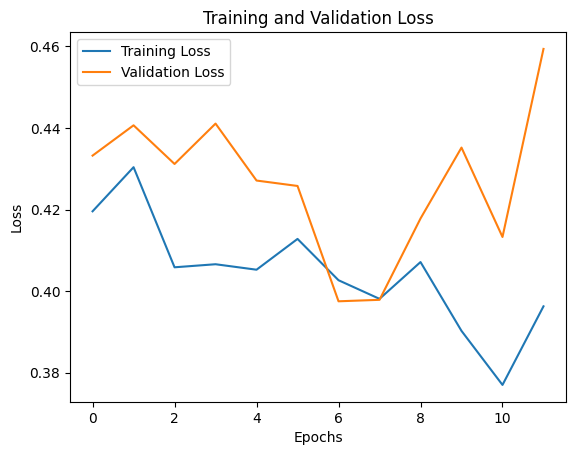

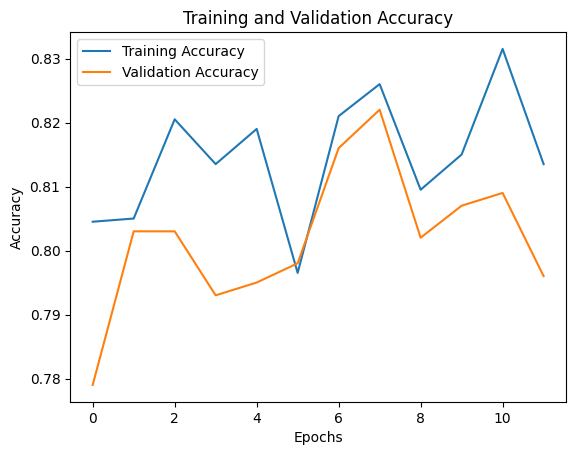

In [18]:
import matplotlib.pyplot as plt

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get the true labels from validation data
val_labels = []
val_images = []
for images, labels in val_data:
    val_images.append(images)
    val_labels.extend(labels)
    if len(val_labels) >= len(val_data.labels):  # Stop when all images are collected
        break

# Convert list to NumPy arrays
val_images = np.concatenate(val_images, axis=0)
val_labels = np.array(val_labels)

# Get model predictions
predictions = model.predict(val_images)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


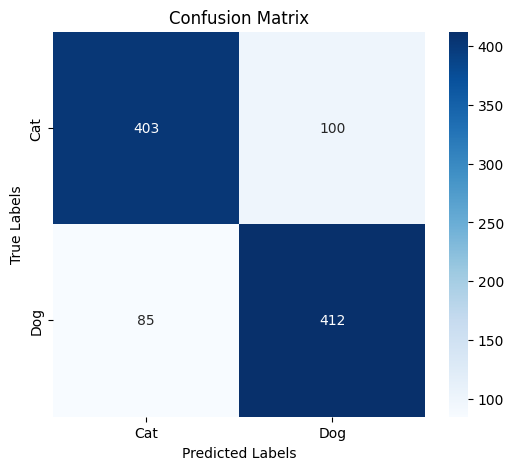

Classification Report:
               precision    recall  f1-score   support

         Cat       0.83      0.80      0.81       503
         Dog       0.80      0.83      0.82       497

    accuracy                           0.81      1000
   macro avg       0.82      0.82      0.81      1000
weighted avg       0.82      0.81      0.81      1000



In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(val_labels, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
report = classification_report(val_labels, predicted_labels, target_names=['Cat', 'Dog'])
print("Classification Report:\n", report)

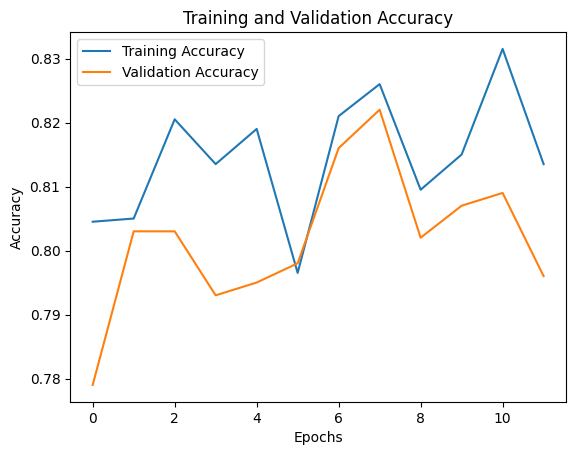

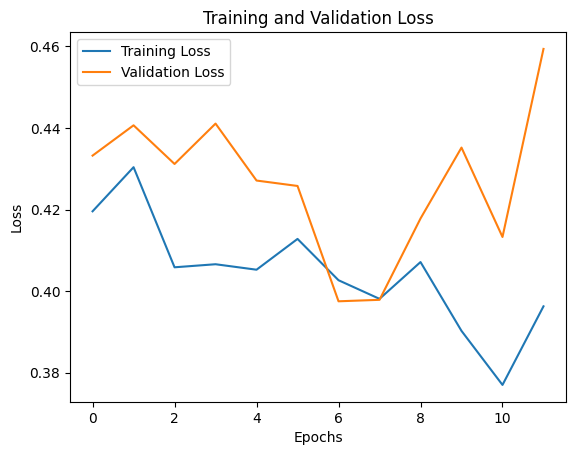

In [21]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
